<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [92]:
df = pd.read_csv('german_credit_data.csv')


#### View top 5 rows

In [93]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [4]:
df.shape

(1000, 11)

#### Columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [7]:
df.fillna("unknown", inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [9]:
df.nunique
print(df)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own         unknown           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little          unknown   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little          unknown   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little          unknown   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0    

##### Create a New column Id by replacing unnamed column

In [94]:
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 62.6+ KB


#### Find basic statistical information about the dataset

In [12]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [13]:
grouped = df.groupby(["Sex", "Risk", "Purpose"]).count()

print(grouped["Id"])

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [14]:
grouped = df.groupby(["Purpose","Risk","Sex"]).count()

print(grouped["Id"])

Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

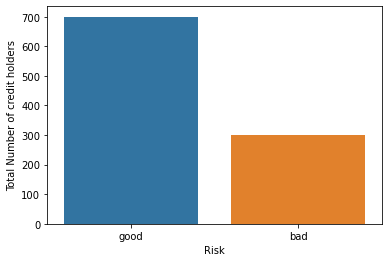

In [15]:
sns.countplot(x = 'Risk',data = df)
plt.ylabel("Total Number of credit holders")
plt.show()

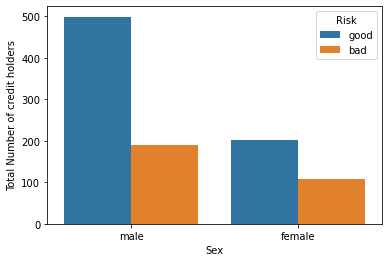

In [16]:
sns.countplot(x = 'Sex',hue = 'Risk',data = df)
plt.ylabel("Total Number of credit holders")

plt.show()

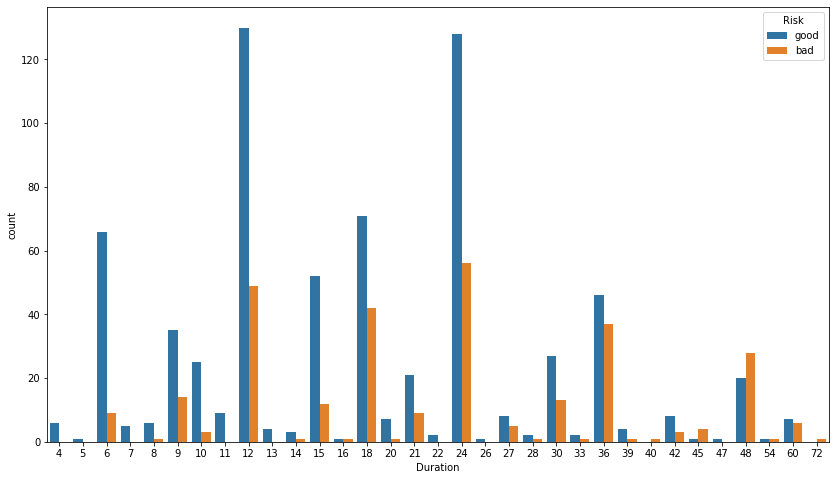

In [17]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'Duration',hue = 'Risk',data = df)
plt.show()

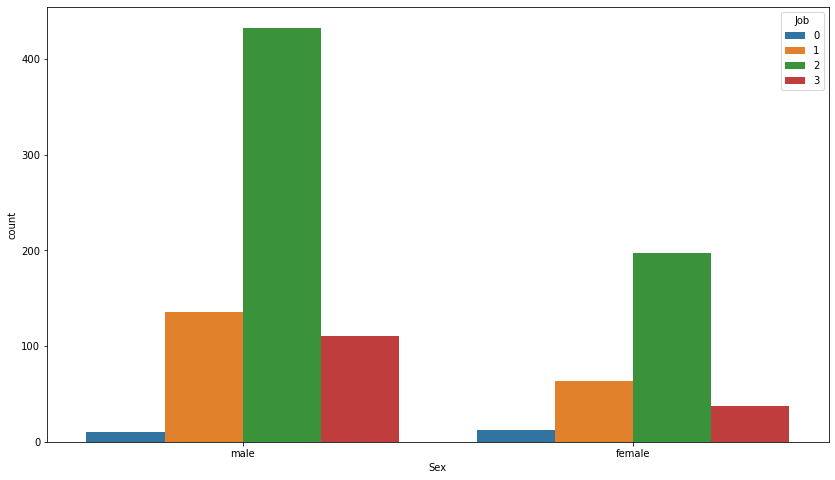

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'Sex',hue = 'Job',data = df)
plt.show()

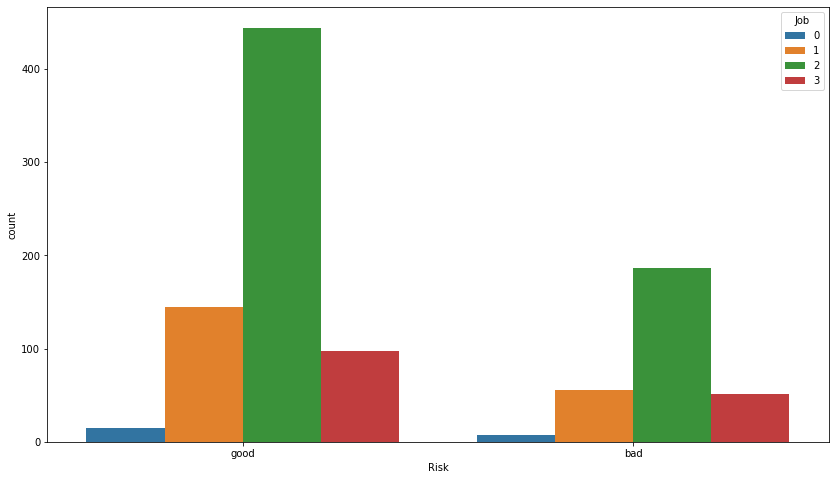

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'Risk',hue = 'Job',data = df)
plt.show()

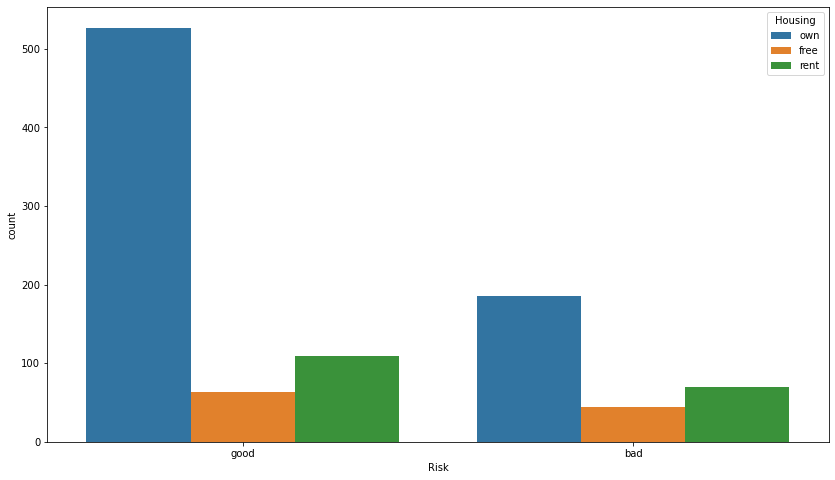

In [20]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'Risk',hue = 'Housing',data = df)
plt.show()

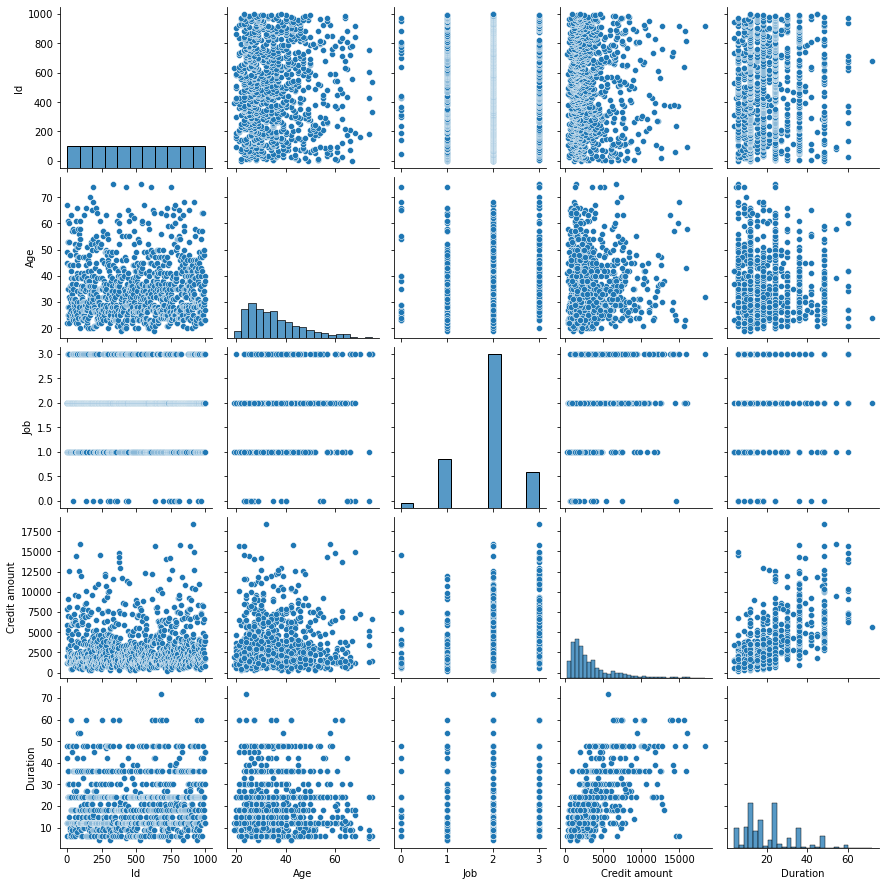

In [21]:
sns.pairplot(df)
plt.show()

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [22]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [23]:
dummies = pd.get_dummies(df['Purpose'], prefix='Purpose')
newdf = pd.concat([df.drop('Purpose',axis=1), dummies], axis=1)


In [24]:
newdf.drop(columns=['Id'],inplace = True)

In [25]:
newdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,male,2,own,unknown,little,1169,6,good,0,0,0,0,0,1,0,0
1,22,female,2,own,little,moderate,5951,48,bad,0,0,0,0,0,1,0,0
2,49,male,1,own,little,unknown,2096,12,good,0,0,0,1,0,0,0,0
3,45,male,2,free,little,little,7882,42,good,0,0,0,0,1,0,0,0
4,53,male,2,free,little,little,4870,24,bad,0,1,0,0,0,0,0,0


#### Use label encoding for rest of the categorical data

In [26]:
from sklearn.preprocessing import LabelEncoder


In [27]:
le = LabelEncoder()

cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Risk']

for col in cols:
    newdf[col] = le.fit_transform(newdf[col])


In [28]:
newdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,4,0,1169,6,1,0,0,0,0,0,1,0,0
1,22,0,2,1,0,1,5951,48,0,0,0,0,0,0,1,0,0
2,49,1,1,1,0,3,2096,12,1,0,0,0,1,0,0,0,0
3,45,1,2,0,0,0,7882,42,1,0,0,0,0,1,0,0,0
4,53,1,2,0,0,0,4870,24,0,0,1,0,0,0,0,0,0


### Check the unique values in the new dataframe

In [29]:
for col in newdf.columns:
    print(f"Unique values in {col}: {newdf[col].unique()}")

Unique values in Age: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Unique values in Sex: [1 0]
Unique values in Job: [2 1 3 0]
Unique values in Housing: [1 0 2]
Unique values in Saving accounts: [4 0 2 3 1]
Unique values in Checking account: [0 1 3 2]
Unique values in Credit amount: [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  

### Plot heatmap

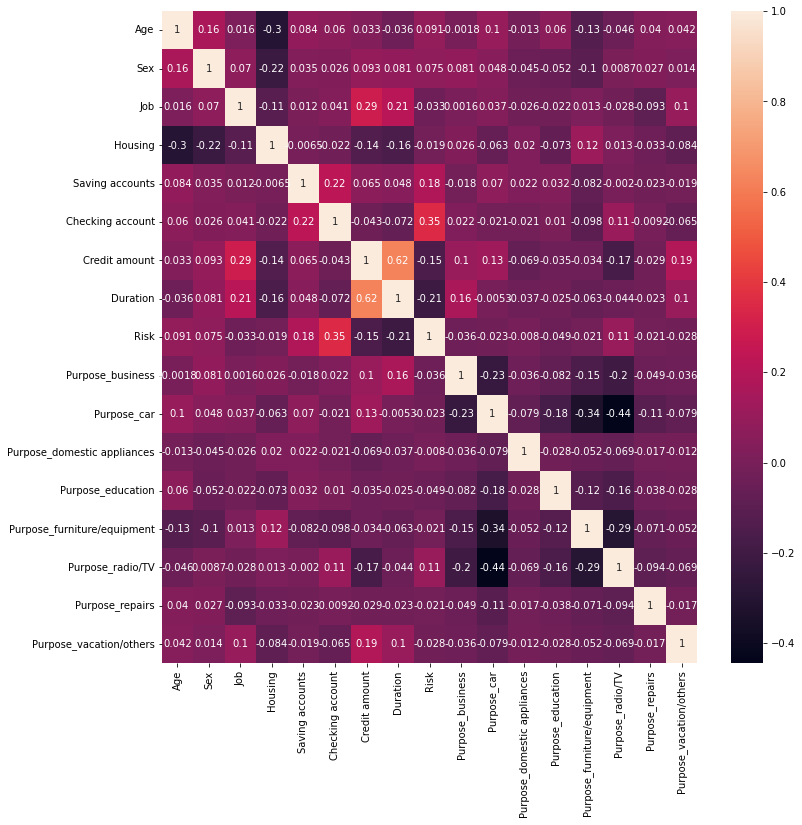

In [30]:
plt.figure(figsize=(12,12))
corr = newdf.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Select the Dependent(target) and Independent Variables:

In [31]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [32]:
X = newdf.drop(columns=['Risk'])
y = newdf['Risk']

# Standardize the data

In [33]:
from sklearn.preprocessing import StandardScaler


In [34]:
scaler = StandardScaler()

In [35]:
X = pd.get_dummies(X)

In [36]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [37]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.745131,-1.236478,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,0.949817,2.248194,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.416562,-0.738668,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.634247,1.750384,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.566664,0.256953,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [40]:
X_train.shape

(750, 16)

In [41]:
X_test.shape

(250, 16)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [42]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [43]:
RandomForestClassifier()

RandomForestClassifier()

In [44]:
params = [{'n_estimators':list(range(50,60)),
           'max_depth': [1,10],'random_state':[1,10,20,42]
           }]


In [45]:
random_fore = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')


In [46]:
random_fore.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 10],
                          'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                           59],
                          'random_state': [1, 10, 20, 42]}],
             scoring='accuracy')

In [48]:
best_params = random_fore.best_params_
best_score = np.round(random_fore.best_score_, 4)

print("Best estimator is: ", random_fore.best_estimator_)
print("Best parameters are: ", best_params)
print("Best score is: ", best_score)

Best estimator is:  RandomForestClassifier(max_depth=10, n_estimators=59, random_state=1)
Best parameters are:  {'max_depth': 10, 'n_estimators': 59, 'random_state': 1}
Best score is:  0.728


In [49]:
print( random_fore.best_estimator_)


RandomForestClassifier(max_depth=10, n_estimators=59, random_state=1)


### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [51]:
y_pred = random_fore.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cv_score = cross_val_score(random_fore, X, y, cv=5)

In [53]:
print("Accuracy score: ", accuracy)
print("Confusion matrix: \n", cm)
print("Classification report: \n", cr)
print("Cross val score: ", cv_score.mean())

Accuracy score:  0.756
Confusion matrix: 
 [[ 24  43]
 [ 18 165]]
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.36      0.44        67
           1       0.79      0.90      0.84       183

    accuracy                           0.76       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.73      0.76      0.74       250

Cross val score:  0.749


#### Visualize the confusion matrix

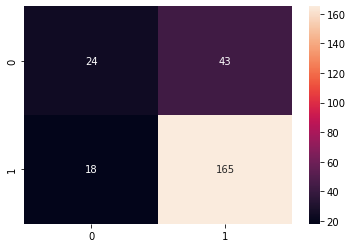

In [54]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True,fmt = 'd')
plt.show()

## SupportVectorClassifier:

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [56]:
support_vect = GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
support_vect.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [57]:
best_estimator = support_vect.best_estimator_
best_params = support_vect.best_params_
best_score = support_vect.best_score_

print("Best estimator is: ", best_estimator)
print("Best parameters are: ", best_params)
print("Best score is: ", best_score)

Best estimator is:  SVC(C=1)
Best parameters are:  {'C': 1, 'degree': 3, 'kernel': 'rbf'}
Best score is:  0.728


In [58]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cv_score = cross_val_score(best_estimator, X, y, cv=5)

print("Accuracy score: ", accuracy)
print("Confusion matrix: \n", cm)
print("Classification report: \n", cr)
print("Cross val score: ", cv_score.mean())

Accuracy score:  0.756
Confusion matrix: 
 [[ 24  43]
 [ 18 165]]
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.36      0.44        67
           1       0.79      0.90      0.84       183

    accuracy                           0.76       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.73      0.76      0.74       250

Cross val score:  0.743


## LogisticRegression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logistic_reg = LogisticRegression()

In [61]:
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [62]:
print('score of our trained model is :',logistic_reg.score(X_train, y_train))

score of our trained model is : 0.7426666666666667


In [63]:
y_pred = logistic_reg.predict(X_test)

In [64]:
print('Accuracy score of our prediction is:',metrics.accuracy_score(y_test,y_pred))
print('Confision matrix is:\n',metrics.confusion_matrix(y_test, y_pred))
print('Classification report is:\n',metrics.classification_report(y_test, y_pred))

print('cross val score:',cross_val_score(best_estimator, X, y, cv=5).mean())

Accuracy score of our prediction is: 0.764
Confision matrix is:
 [[ 28  39]
 [ 20 163]]
Classification report is:
               precision    recall  f1-score   support

           0       0.58      0.42      0.49        67
           1       0.81      0.89      0.85       183

    accuracy                           0.76       250
   macro avg       0.70      0.65      0.67       250
weighted avg       0.75      0.76      0.75       250

cross val score: 0.743


## AdaBoost: Classifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
ada_boost = AdaBoostClassifier()

In [67]:
ada_boost.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
y_pred = ada_boost.predict(X_test)

In [69]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Confusion metrics:',metrics.confusion_matrix(y_test, y_pred))
print('Classification Report:',metrics.classification_report(y_test,y_pred))
print('Cross val Sore:',cross_val_score(best_estimator, X, y, cv=5).mean())

Accuracy score : 0.768
Confusion metrics: [[ 35  32]
 [ 26 157]]
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.52      0.55        67
           1       0.83      0.86      0.84       183

    accuracy                           0.77       250
   macro avg       0.70      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250

Cross val Sore: 0.743


### View scores of the different models 

In [70]:
randomfor_score = accuracy_score(y_test, random_fore.best_estimator_.predict(X_test))
svm_score = accuracy_score(y_test, support_vect.best_estimator_.predict(X_test))

logistic_pred = logistic_reg.predict(X_test)
logistic_score = accuracy_score(y_test, logistic_pred)


ada_boost_pred = ada_boost.predict(X_test)
adaboost_score = accuracy_score(y_test, ada_boost_pred)


In [71]:
import pandas as pd

scores = {'Model': ['Random Forest Classifier','Logistic Regression', 'Gradient Boost Classifier', 'Support Vector Classifier'], 
          'Score': [logistic_score, adaboost_score, randomfor_score, svm_score]}

df = pd.DataFrame(scores)


In [72]:
df

,Model,Score
0,Random Forest Classifier,0.764
1,Logistic Regression,0.768
2,Gradient Boost Classifier,0.756
3,Support Vector Classifier,0.760


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [73]:
from sklearn.decomposition import PCA


In [74]:
pca = PCA(n_components=5)

In [76]:
x_pca = pca.fit_transform(X)

In [77]:
pca.n_components_

5

In [78]:
pd.DataFrame(x_pca)

,0,1,2,3,4
0,-0.523637,-2.312362,0.916442,0.766684,-0.616107
1,0.634459,1.609207,1.799453,-0.783788,-1.075194
2,-0.775782,-1.716846,-0.061537,2.016327,1.569157
3,2.256533,1.517078,0.050301,2.105086,-0.668861
4,1.930012,-1.130887,-1.395114,1.425788,-1.020415
...,...,...,...,...,...
995,-1.966008,1.103775,-0.509732,0.372451,0.344726
996,1.679579,0.167926,-1.188235,0.110132,-1.109025
997,-1.094074,-1.223399,1.565181,0.041251,-0.754071
998,0.826416,0.292774,1.841279,0.886789,-1.480667


In [79]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [80]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [81]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [82]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_predi = logisticRegr.predict(X_test)

In [84]:
print(logisticRegr.score(X_train, y_train))

0.7426666666666667


In [85]:
from sklearn import metrics


In [86]:
metrics.confusion_matrix(y_test,y_predi)

array([[ 28,  39],
       [ 20, 163]], dtype=int64)

In [87]:
print(metrics.accuracy_score(y_test,y_predi))


0.764


## Model Deployment With Tkinter

### Import Tkinter Library

In [89]:
from tkinter import *
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will return the output of our prediction in an Entry box in tkinter window

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [95]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [110]:
def getPrediction():
    # .get() function is used to fetch the value from the entrybox and radiobuttons
    age1 = int(age.get())
    salary1 = int(salary.get())
    
    resultbox.delete(0, END)
    
    if gender.get() == 1:
        male = 1
        female = 0
    else:
        male = 0
        female = 1
        
    if job.get() == 0:
        
        
        
    
    
    
    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = model.predict(scaler.transform([[age1, salary1,male,female]]))
    
    if result[0] == 1:
        resultbox.insert(0, 'Good')
    elif result[0] == 0:
        resultbox.insert(0, 'Bad')
    else:
        resultbox.insert(0, 'Error')


### Create Tkinter window and all necessary input and output boxes

In [116]:
window = Tk()
window.geometry("350x400")

titlelabel = Label(window, text = 'Costumer Behaviuor Prediction', bg ='blue').pack(fill = 'both')

agelabel = Label(window, text = 'Age')
age = Entry(window)

salarylabel = Label(window, text = 'Estimated Salary')
salary = Entry(window)
Label(window).pack()

gender = StringVar()
gender.set(1)
genderlabel = Label(window, text = 'Gender')

agelabel.pack()
age.pack()
Label(window).pack()

salarylabel.pack()
salary.pack()
Label(window).pack()

genderlabel.pack()
Radiobutton(window, text = 'male', variable = gender , value = 1).pack()
Radiobutton(window, text = 'female', variable = gender , value = 2).pack()
Label(window).pack()


button = Button(window, text = 'Get Prediction', command = getPrediction).pack()
Label(window).pack()

resultbox = Entry(window)
resultbox.pack()

window.mainloop()

In [115]:
import tkinter as tk
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def predict_risk():
    # Get values from the input fields
    age = int(age_entry.get())
    sex = sex_entry.get()
    job = int(job_entry.get())
    housing = housing_entry.get()
    savings = savings_entry.get()
    checking = int(checking_entry.get())
    credit = int(credit_entry.get())
    duration = int(duration_entry.get())
    purpose = purpose_entry.get()
    
    # Preprocess the input data
    data = {'Age': [age], 'Sex': [sex], 'Job': [job], 'Housing': [housing], 
            'Saving accounts': [savings], 'Checking account': [checking],
            'Credit amount': [credit], 'Duration': [duration], 'Purpose': [purpose]}
    df = pd.DataFrame(data)
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Housing'] = le.fit_transform(df['Housing'])
    df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
    df['Purpose'] = le.fit_transform(df['Purpose'])
    
    # Load the trained model and make the prediction
    model = LogisticRegression()
    model.fit(df.drop('Purpose', axis=1), df['Purpose'])
    result = model.predict(df.drop('Purpose', axis=1))
    if result[0] == 0:
        prediction = "Risk: Bad"
    else:
        prediction = "Risk: Good"
    
    # Display the prediction in the output field
    result_label.config(text=prediction)

# Create the Tkinter window
window = tk.Tk()
window.title("German Credit Dataset")

# Create the input fields
age_label = tk.Label(text="Age")
age_label.grid(row=0, column=0, sticky="W")
age_entry = tk.Entry()
age_entry.grid(row=0, column=1)

sex_label = tk.Label(text="Sex (male/female)")
sex_label.grid(row=1, column=0, sticky="W")
sex_entry = tk.Entry()
sex_entry.grid(row=1, column=1)

job_label = tk.Label(text="Job (0-3)")
job_label.grid(row=2, column=0, sticky="W")
job_entry = tk.Entry()
job_entry.grid(row=2, column=1)

housing_label = tk.Label(text="Housing (own/rent/free)")
housing_label.grid(row=3, column=0, sticky="W")
housing_entry = tk


***

# <span style = "color:coral"> Great Job!  You Have Succesfully deployed your ML Model</span>